In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

282

In [6]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | nome
Processing Record 5 of Set 1 | solnechnyy
Processing Record 6 of Set 1 | ndioum
Processing Record 7 of Set 1 | videira
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | leshukonskoye
Processing Record 11 of Set 1 | pogranichnyy
Processing Record 12 of Set 1 | pochutla
Processing Record 13 of Set 1 | rafiganj
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | marcona
City not found. Skipping...
Processing Record 18 of Set 1 | itarantim
Processing Record 19 of Set 1 | haibowan
City not found. Skipping...
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 

Processing Record 37 of Set 4 | umm kaddadah
Processing Record 38 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 39 of Set 4 | longyearbyen
Processing Record 40 of Set 4 | kilinochchi
Processing Record 41 of Set 4 | dzilam gonzalez
Processing Record 42 of Set 4 | kaitangata
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | lishan
Processing Record 45 of Set 4 | sukhumi
Processing Record 46 of Set 4 | mlonggo
Processing Record 47 of Set 4 | khuzdar
Processing Record 48 of Set 4 | namatanai
Processing Record 49 of Set 4 | kuryk
Processing Record 50 of Set 4 | sangueya
Processing Record 1 of Set 5 | takoradi
Processing Record 2 of Set 5 | fairbanks
Processing Record 3 of Set 5 | juegang
Processing Record 4 of Set 5 | kracheh
City not found. Skipping...
Processing Record 5 of Set 5 | sao jose da coroa grande
Processing Record 6 of Set 5 | pevek
Processing Record 7 of Set 5 | katsuura
Processing Record 8 of Set 5 | mys shmidta
City not found. S

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,69.87,51,100,2.59,RU,2022-07-07 07:36:03
1,Vaini,-21.2000,-175.2000,71.76,78,20,5.75,TO,2022-07-07 07:36:03
2,Punta Arenas,-53.1500,-70.9167,30.31,93,0,8.05,CL,2022-07-07 07:36:03
3,Nome,64.5011,-165.4064,58.15,94,100,6.91,US,2022-07-07 07:34:27
4,Solnechnyy,50.7214,136.6319,85.48,57,5,12.97,RU,2022-07-07 07:36:04
5,Ndioum,16.5129,-14.6471,76.89,70,4,12.80,SN,2022-07-07 07:36:04
6,Videira,-27.0083,-51.1517,53.60,86,100,1.66,BR,2022-07-07 07:36:05
7,Barrow,71.2906,-156.7887,46.42,87,0,16.11,US,2022-07-07 07:36:05
8,Leshukonskoye,64.8989,45.7622,76.51,34,54,8.05,RU,2022-07-07 07:36:06
9,Pogranichnyy,44.4064,131.3769,67.73,92,100,6.67,RU,2022-07-07 07:36:06


In [8]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]


city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2022-07-07 07:36:03,59.7035,30.7861,69.87,51,100,2.59
1,Vaini,TO,2022-07-07 07:36:03,-21.2000,-175.2000,71.76,78,20,5.75
2,Punta Arenas,CL,2022-07-07 07:36:03,-53.1500,-70.9167,30.31,93,0,8.05
3,Nome,US,2022-07-07 07:34:27,64.5011,-165.4064,58.15,94,100,6.91
4,Solnechnyy,RU,2022-07-07 07:36:04,50.7214,136.6319,85.48,57,5,12.97


In [9]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

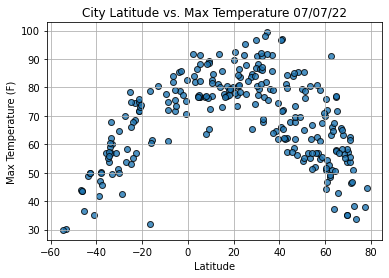

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

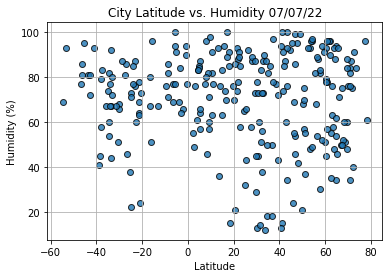

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

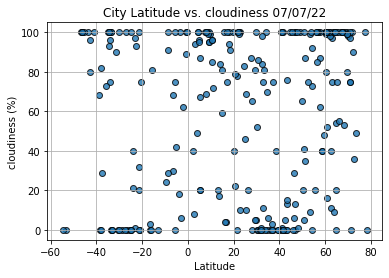

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness "+ time.strftime("%x"))
plt.ylabel("cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

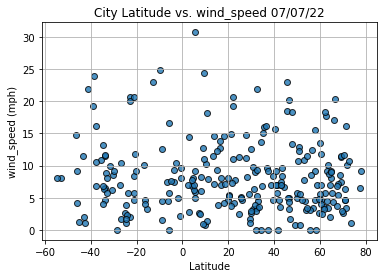

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. wind_speed "+ time.strftime("%x"))
plt.ylabel("wind_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    

    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=10, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()    



In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

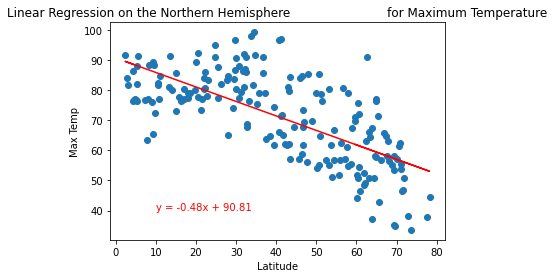

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

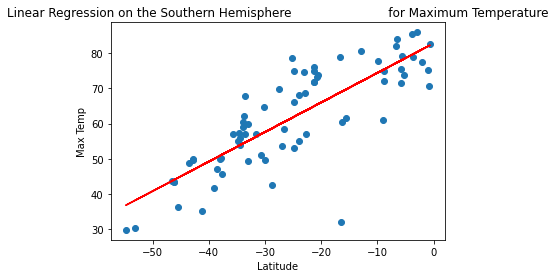

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

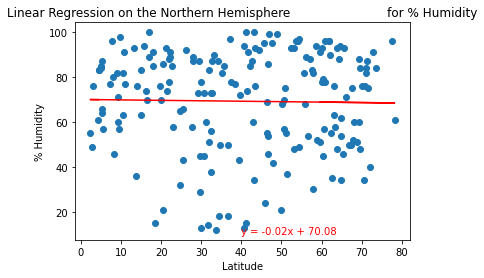

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

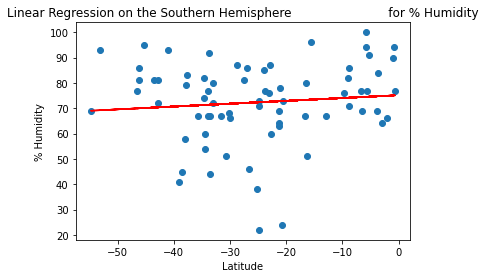

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

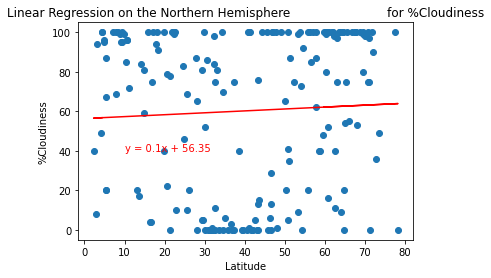

In [30]:
# Linear regression on the Northern Hemisphere for % Coludiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for %Cloudiness', '%Cloudiness',(10,40))

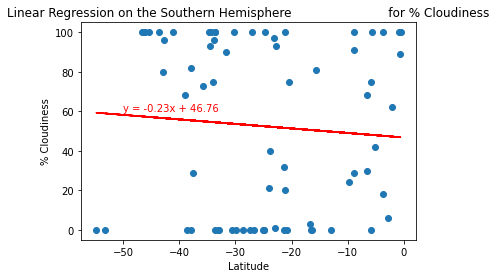

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

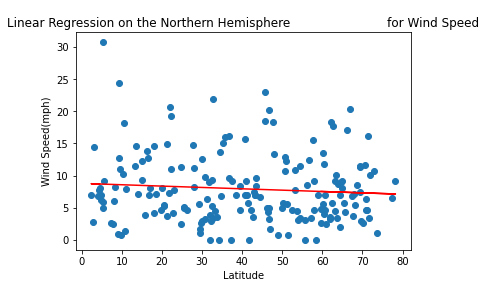

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed(mph)',(40,35))

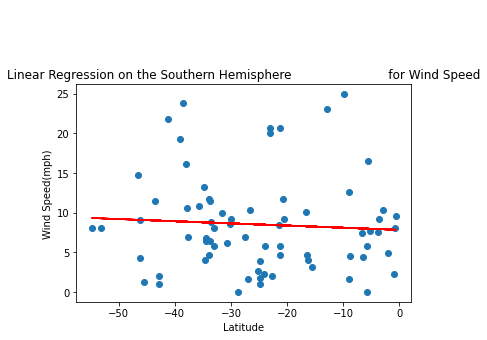

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed(mph)',(-50,35))